In [1]:
se_f =  "/data2/mito_lineage/output/annotation/data/v01_oct012021/cd34norm/MTblacklist/mergedSamples/allSamples.integrated.rds"
cells_meta_f = "/data2/mito_lineage/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/concat/cells_meta.tsv"
#"/data2/mito_lineage/output/pipeline/cd34norm/MTblacklist/data/merged/clones.txt"
outdir = "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist"
ids.reversed = TRUE
#enrichment_f

In [2]:
cells_meta <- as.data.frame(readr::read_tsv(cells_meta_f)) # %>% tidyr::unite(barcode)
rownames(cells_meta) = cells_meta$ID



Rows: 14882 Columns: 4

── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): ID, condition
dbl (2): lineage, donor


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [3]:
if (ids.reversed){
    split.names <- stringr::str_split(rownames(cells_meta), "_")
    rownames(cells_meta) = lapply(split.names, function(x){paste0(x[2], "_", x[1])})
}
head(cells_meta)

,ID,lineage,donor,condition
,<chr>,<dbl>,<dbl>,<chr>
Flt3l_AAACGAATCAAGTTGC-1,AAACGAATCAAGTTGC-1_Flt3l,0,0,Flt3l
Control_AAACTCGCAAGACTTC-1,AAACTCGCAAGACTTC-1_Control,0,0,Control
Flt3l_AAACTGCCAAGGGTAC-1,AAACTGCCAAGGGTAC-1_Flt3l,0,0,Flt3l
Flt3l_AAAGGATGTGGTTCTA-1,AAAGGATGTGGTTCTA-1_Flt3l,0,0,Flt3l
Control_AAAGGGCCATAGGCGA-1,AAAGGGCCATAGGCGA-1_Control,0,0,Control
Flt3l_AAAGGGCGTTCTGAGT-1,AAAGGGCGTTCTGAGT-1_Flt3l,0,0,Flt3l


In [4]:
se <- readRDS(se_f)
se[[]]

Loading required package: SeuratObject



,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,promoter_region_fragments,on_target_fragments,blacklist_region_fragments,peak_region_fragments,peak_region_cutsites,proj,ATAC_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<dbl>,<int>
Control_AAACGAAAGAGGTCCA-1,Control,1357,1357,16929,2587,58,70,674,9629,3911,⋯,0,740,0,1330,2434,Control,5,5,1673,1406
Control_AAACGAAAGCGATACG-1,Control,3505,3505,45359,10546,184,184,2302,22247,9896,⋯,0,1611,0,3462,6167,Control,0,0,4315,3063
Control_AAACGAAAGTCGTGAG-1,Control,994,994,10177,2450,48,60,657,2135,4827,⋯,0,775,0,966,1768,Control,5,5,1731,1414
Control_AAACGAACAATAGTGA-1,Control,2687,2687,22452,4364,100,83,897,9233,7775,⋯,0,1239,0,2701,4951,Control,0,0,3113,2340
Control_AAACGAACACAATAAG-1,Control,1184,1184,11763,2003,43,57,680,5547,3433,⋯,0,621,0,1138,2019,Control,5,5,1559,1394
Control_AAACGAACACTGATAC-1,Control,954,954,9449,1971,59,21,489,3785,3124,⋯,0,517,0,878,1595,Control,2,2,1370,1207
Control_AAACGAACAGTAACCT-1,Control,693,693,6196,1097,19,17,288,2635,2140,⋯,0,397,0,651,1170,Control,8,8,1018,939
Control_AAACGAACATCGTGAT-1,Control,6800,6800,100024,36721,588,531,5317,36828,20039,⋯,0,3467,0,7263,13261,Control,12,12,8645,5001
Control_AAACGAAGTAACGGTG-1,Control,1074,1074,8454,1950,24,33,354,3729,2364,⋯,0,451,0,1042,1920,Control,7,7,1005,905


In [5]:
# se_meta = se[[]]
# rownames(se_meta) <- apply(stringr::str_split((rownames(se_meta)), "_", simplify=T)[,1:2], 1, function(x) {paste0(x[1],  "_", x[2])})

In [6]:
se$ID <- apply(stringr::str_split((rownames(se[[]])), "_", simplify=T)[,1:2], 1, function(x) {paste0(x[[1]],  "_", x[[2]])})

Loading required package: Signac

Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 



In [7]:
se <- RenameCells(se, new.names=se$ID)

In [8]:
se[[]]

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,on_target_fragments,blacklist_region_fragments,peak_region_fragments,peak_region_cutsites,proj,ATAC_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA,ID
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<dbl>,<int>,<chr>
Control_AAACGAAAGAGGTCCA-1,Control,1357,1357,16929,2587,58,70,674,9629,3911,⋯,740,0,1330,2434,Control,5,5,1673,1406,Control_AAACGAAAGAGGTCCA-1
Control_AAACGAAAGCGATACG-1,Control,3505,3505,45359,10546,184,184,2302,22247,9896,⋯,1611,0,3462,6167,Control,0,0,4315,3063,Control_AAACGAAAGCGATACG-1
Control_AAACGAAAGTCGTGAG-1,Control,994,994,10177,2450,48,60,657,2135,4827,⋯,775,0,966,1768,Control,5,5,1731,1414,Control_AAACGAAAGTCGTGAG-1
Control_AAACGAACAATAGTGA-1,Control,2687,2687,22452,4364,100,83,897,9233,7775,⋯,1239,0,2701,4951,Control,0,0,3113,2340,Control_AAACGAACAATAGTGA-1
Control_AAACGAACACAATAAG-1,Control,1184,1184,11763,2003,43,57,680,5547,3433,⋯,621,0,1138,2019,Control,5,5,1559,1394,Control_AAACGAACACAATAAG-1
Control_AAACGAACACTGATAC-1,Control,954,954,9449,1971,59,21,489,3785,3124,⋯,517,0,878,1595,Control,2,2,1370,1207,Control_AAACGAACACTGATAC-1
Control_AAACGAACAGTAACCT-1,Control,693,693,6196,1097,19,17,288,2635,2140,⋯,397,0,651,1170,Control,8,8,1018,939,Control_AAACGAACAGTAACCT-1
Control_AAACGAACATCGTGAT-1,Control,6800,6800,100024,36721,588,531,5317,36828,20039,⋯,3467,0,7263,13261,Control,12,12,8645,5001,Control_AAACGAACATCGTGAT-1
Control_AAACGAAGTAACGGTG-1,Control,1074,1074,8454,1950,24,33,354,3729,2364,⋯,451,0,1042,1920,Control,7,7,1005,905,Control_AAACGAAGTAACGGTG-1


In [9]:
new_cells_meta = merge(cells_meta, se[[]], by=0, all=TRUE)
head(new_cells_meta)

,Row.names,ID.x,lineage,donor,condition,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,⋯,on_target_fragments,blacklist_region_fragments,peak_region_fragments,peak_region_cutsites,proj,ATAC_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA,ID.y
,<I<chr>>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<dbl>,<int>,<chr>
1,Control_AAACGAAAGAGGTCCA-1,AAACGAAAGAGGTCCA-1_Control,9,3,Control,Control,1357,1357,16929,2587,⋯,740,0,1330,2434,Control,5,5,1673,1406,Control_AAACGAAAGAGGTCCA-1
2,Control_AAACGAAAGCGATACG-1,AAACGAAAGCGATACG-1_Control,0,1,Control,Control,3505,3505,45359,10546,⋯,1611,0,3462,6167,Control,0,0,4315,3063,Control_AAACGAAAGCGATACG-1
3,Control_AAACGAAAGTCGTGAG-1,AAACGAAAGTCGTGAG-1_Control,8,0,Control,Control,994,994,10177,2450,⋯,775,0,966,1768,Control,5,5,1731,1414,Control_AAACGAAAGTCGTGAG-1
4,Control_AAACGAACAATAGTGA-1,AAACGAACAATAGTGA-1_Control,11,3,Control,Control,2687,2687,22452,4364,⋯,1239,0,2701,4951,Control,0,0,3113,2340,Control_AAACGAACAATAGTGA-1
5,Control_AAACGAACACAATAAG-1,AAACGAACACAATAAG-1_Control,22,0,Control,Control,1184,1184,11763,2003,⋯,621,0,1138,2019,Control,5,5,1559,1394,Control_AAACGAACACAATAAG-1
6,Control_AAACGAACACTGATAC-1,AAACGAACACTGATAC-1_Control,11,2,Control,Control,954,954,9449,1971,⋯,517,0,878,1595,Control,2,2,1370,1207,Control_AAACGAACACTGATAC-1


In [10]:
rownames(new_cells_meta) <- new_cells_meta$Row.names

In [11]:
donor_levels <- levels(factor(new_cells_meta$donor))
donor_levels[length(donor_levels) + 1] <- "None"

condition_levels <- levels(factor(new_cells_meta$condition))
condition_levels[length(condition_levels) + 1] <- "None"

lineage_levels <- levels(factor(new_cells_meta$lineage))
lineage_levels[length(lineage_levels) + 1] <- "None"


new_cells_meta$name <- paste0(new_cells_meta$donor, "_", new_cells_meta$lineage)
name_levels <- levels(factor(new_cells_meta$name))
name_levels[length(name_levels) + 1] <- "None"



new_cells_meta$donor <- factor(new_cells_meta$donor, levels=donor_levels)
new_cells_meta$condition <- factor(new_cells_meta$condition, levels=condition_levels)
new_cells_meta$lineage <- factor(new_cells_meta$lineage, levels=lineage_levels)
new_cells_meta$name <- factor(new_cells_meta$name, levels=name_levels)



new_cells_meta$donor[is.na(new_cells_meta$donor)] <- "None"
new_cells_meta$condition[is.na(new_cells_meta$condition)] <- "None"
new_cells_meta$lineage[is.na(new_cells_meta$lineage)] <- "None"
new_cells_meta$name[is.na(new_cells_meta$name)] <- "None"

In [12]:
new_cells_meta

,Row.names,ID.x,lineage,donor,condition,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,⋯,blacklist_region_fragments,peak_region_fragments,peak_region_cutsites,proj,ATAC_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA,ID.y,name
,<I<chr>>,<chr>,<fct>,<fct>,<fct>,<chr>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<dbl>,<int>,<chr>,<fct>
Control_AAACGAAAGAGGTCCA-1,Control_AAACGAAAGAGGTCCA-1,AAACGAAAGAGGTCCA-1_Control,9,3,Control,Control,1357,1357,16929,2587,⋯,0,1330,2434,Control,5,5,1673,1406,Control_AAACGAAAGAGGTCCA-1,3_9
Control_AAACGAAAGCGATACG-1,Control_AAACGAAAGCGATACG-1,AAACGAAAGCGATACG-1_Control,0,1,Control,Control,3505,3505,45359,10546,⋯,0,3462,6167,Control,0,0,4315,3063,Control_AAACGAAAGCGATACG-1,1_0
Control_AAACGAAAGTCGTGAG-1,Control_AAACGAAAGTCGTGAG-1,AAACGAAAGTCGTGAG-1_Control,8,0,Control,Control,994,994,10177,2450,⋯,0,966,1768,Control,5,5,1731,1414,Control_AAACGAAAGTCGTGAG-1,0_8
Control_AAACGAACAATAGTGA-1,Control_AAACGAACAATAGTGA-1,AAACGAACAATAGTGA-1_Control,11,3,Control,Control,2687,2687,22452,4364,⋯,0,2701,4951,Control,0,0,3113,2340,Control_AAACGAACAATAGTGA-1,3_11
Control_AAACGAACACAATAAG-1,Control_AAACGAACACAATAAG-1,AAACGAACACAATAAG-1_Control,22,0,Control,Control,1184,1184,11763,2003,⋯,0,1138,2019,Control,5,5,1559,1394,Control_AAACGAACACAATAAG-1,0_22
Control_AAACGAACACTGATAC-1,Control_AAACGAACACTGATAC-1,AAACGAACACTGATAC-1_Control,11,2,Control,Control,954,954,9449,1971,⋯,0,878,1595,Control,2,2,1370,1207,Control_AAACGAACACTGATAC-1,2_11
Control_AAACGAACAGTAACCT-1,Control_AAACGAACAGTAACCT-1,AAACGAACAGTAACCT-1_Control,34,2,Control,Control,693,693,6196,1097,⋯,0,651,1170,Control,8,8,1018,939,Control_AAACGAACAGTAACCT-1,2_34
Control_AAACGAACATCGTGAT-1,Control_AAACGAACATCGTGAT-1,AAACGAACATCGTGAT-1_Control,2,3,Control,Control,6800,6800,100024,36721,⋯,0,7263,13261,Control,12,12,8645,5001,Control_AAACGAACATCGTGAT-1,3_2
Control_AAACGAAGTAACGGTG-1,Control_AAACGAAGTAACGGTG-1,AAACGAAGTAACGGTG-1_Control,36,3,Control,Control,1074,1074,8454,1950,⋯,0,1042,1920,Control,7,7,1005,905,Control_AAACGAAGTAACGGTG-1,3_36


In [13]:
se <- AddMetaData(se, new_cells_meta)
se[[]]

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,nCount_RNA,nFeature_RNA,ID,Row.names,ID.x,lineage,donor,condition,ID.y,name
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<chr>,<I<chr>>,<chr>,<fct>,<fct>,<fct>,<chr>,<fct>
Control_AAACGAAAGAGGTCCA-1,Control,1357,1357,16929,2587,58,70,674,9629,3911,⋯,1673,1406,Control_AAACGAAAGAGGTCCA-1,Control_AAACGAAAGAGGTCCA-1,AAACGAAAGAGGTCCA-1_Control,9,3,Control,Control_AAACGAAAGAGGTCCA-1,3_9
Control_AAACGAAAGCGATACG-1,Control,3505,3505,45359,10546,184,184,2302,22247,9896,⋯,4315,3063,Control_AAACGAAAGCGATACG-1,Control_AAACGAAAGCGATACG-1,AAACGAAAGCGATACG-1_Control,0,1,Control,Control_AAACGAAAGCGATACG-1,1_0
Control_AAACGAAAGTCGTGAG-1,Control,994,994,10177,2450,48,60,657,2135,4827,⋯,1731,1414,Control_AAACGAAAGTCGTGAG-1,Control_AAACGAAAGTCGTGAG-1,AAACGAAAGTCGTGAG-1_Control,8,0,Control,Control_AAACGAAAGTCGTGAG-1,0_8
Control_AAACGAACAATAGTGA-1,Control,2687,2687,22452,4364,100,83,897,9233,7775,⋯,3113,2340,Control_AAACGAACAATAGTGA-1,Control_AAACGAACAATAGTGA-1,AAACGAACAATAGTGA-1_Control,11,3,Control,Control_AAACGAACAATAGTGA-1,3_11
Control_AAACGAACACAATAAG-1,Control,1184,1184,11763,2003,43,57,680,5547,3433,⋯,1559,1394,Control_AAACGAACACAATAAG-1,Control_AAACGAACACAATAAG-1,AAACGAACACAATAAG-1_Control,22,0,Control,Control_AAACGAACACAATAAG-1,0_22
Control_AAACGAACACTGATAC-1,Control,954,954,9449,1971,59,21,489,3785,3124,⋯,1370,1207,Control_AAACGAACACTGATAC-1,Control_AAACGAACACTGATAC-1,AAACGAACACTGATAC-1_Control,11,2,Control,Control_AAACGAACACTGATAC-1,2_11
Control_AAACGAACAGTAACCT-1,Control,693,693,6196,1097,19,17,288,2635,2140,⋯,1018,939,Control_AAACGAACAGTAACCT-1,Control_AAACGAACAGTAACCT-1,AAACGAACAGTAACCT-1_Control,34,2,Control,Control_AAACGAACAGTAACCT-1,2_34
Control_AAACGAACATCGTGAT-1,Control,6800,6800,100024,36721,588,531,5317,36828,20039,⋯,8645,5001,Control_AAACGAACATCGTGAT-1,Control_AAACGAACATCGTGAT-1,AAACGAACATCGTGAT-1_Control,2,3,Control,Control_AAACGAACATCGTGAT-1,3_2
Control_AAACGAAGTAACGGTG-1,Control,1074,1074,8454,1950,24,33,354,3729,2364,⋯,1005,905,Control_AAACGAAGTAACGGTG-1,Control_AAACGAAGTAACGGTG-1,AAACGAAGTAACGGTG-1_Control,36,3,Control,Control_AAACGAAGTAACGGTG-1,3_36


## Plot by donor and condition

In [14]:
library("Seurat")
#library("Seurat")
library(magrittr)
library(cowplot)
library(ggplot2)

In [15]:
library(Seurat)
library(Signac)
library(patchwork)
set.seed(1234)
library(magrittr)
library(cowplot)
library(metap)
library(dplyr)
library(future)


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ERROR: Error in ggplot2(file.path(outdir, paste0("donor_umap.pdf"))): could not find function "ggplot2"


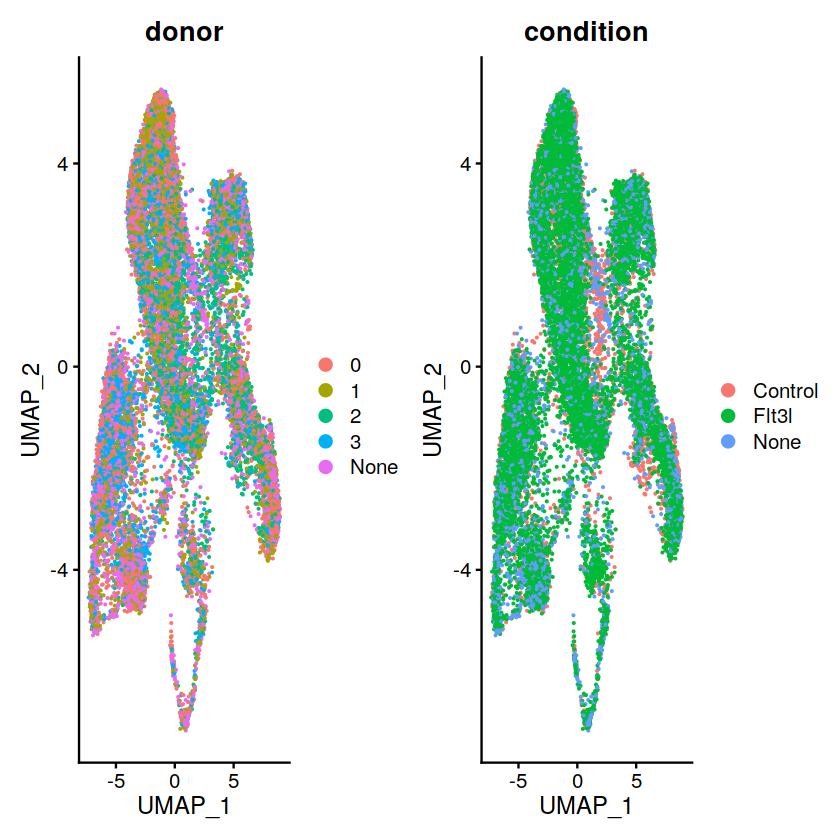

In [16]:
# Idents(t.cells) <- "orig.ident"
DimPlot(object = se, label = FALSE, group.by = c('donor', 'condition')) 
ggplot2(file.path(outdir, paste0("donor_umap.pdf")))

Saving 6.67 x 6.67 in image



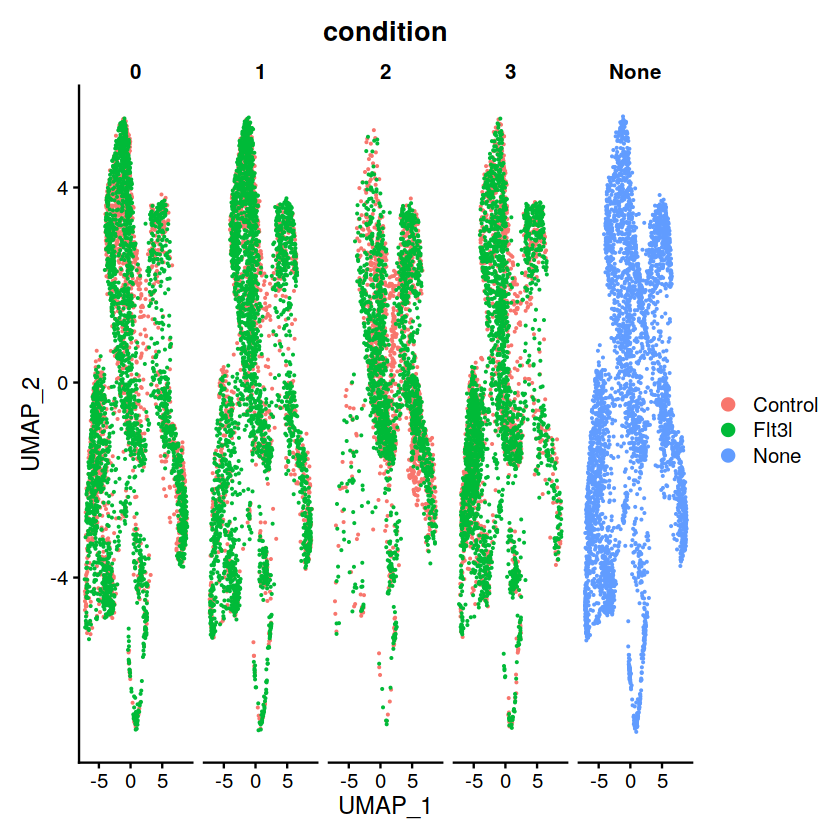

In [18]:
DimPlot(object = se, label = FALSE, split.by="donor", group.by = 'condition')
ggsave(file.path(outdir, paste0("donor_split_umap.pdf")))

## Plot lineage

In [ ]:
DimPlot(object = se, label = FALSE, split.by=c("donor"), group.by = c('condition', "lineage"))
#ggsave(file.path(outdir, "lineage.conditions.png"))

In [19]:
barplot.df <- se[[]] %>% group_by(name) %>% summarize(size=n(), donor=donor)
barplot.df

`summarise()` has grouped output by 'name'. You can override using the `.groups` argument.



name,size,donor
<fct>,<int>,<fct>
0_0,415,0
0_0,415,0
0_0,415,0
0_0,415,0
0_0,415,0
0_0,415,0
0_0,415,0
0_0,415,0
0_0,415,0


Saving 6.67 x 6.67 in image



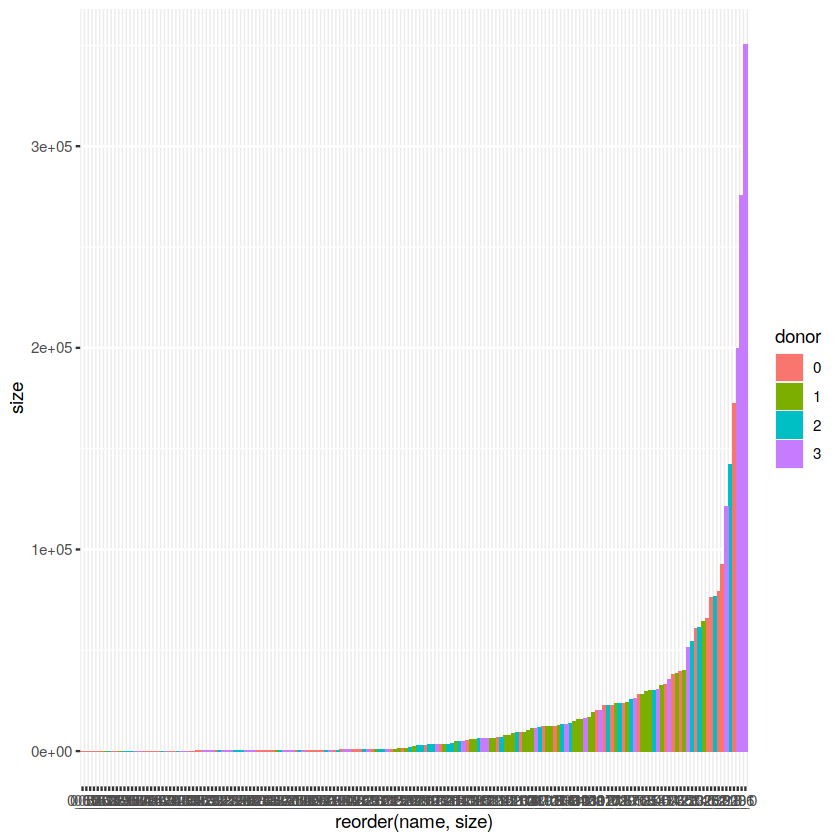

In [23]:
g <- ggplot(barplot.df[!barplot.df$name == "NA_NA", ], aes(x=reorder(name, size), y= size, fill=donor)) + 
            geom_bar(stat='identity')

g
ggsave(file.path(outdir, paste0("clone_count.pdf")))

## Save

In [ ]:
saveRDS(obj=se, file=file.path(outdir, "SE.rds"))

In [ ]:
print